##  Limpieza de datos del csv Pokemon GO

In [0]:
from pyspark.sql.functions import col, regexp_replace, regexp_extract, concat_ws, when
from functools import reduce

# Leemos el archivo pokemon_go.csv
df_pokemon = spark.read.csv("dbfs:/FileStore/shared_uploads/pokemon_go.csv")

# Renombrar Columnas
df_pokemon = df_pokemon.toDF('Pokemon', 'Max CP', 'Max HP', 'Attack', 'Defense', 'Stamina', 'Total Stats', 'Is Legendary', 'Type 1', 'Type 2')

# Comprobar si las cabeceras están como datos y eliminarlas
df_pokemon = df_pokemon.filter(df_pokemon["Pokemon"] != "Pokemon")

# Eliminamos Espacios en blanco del dataframe
for column in df_pokemon.columns:
    df_pokemon = df_pokemon.withColumn(column, regexp_replace(col(column), " ", ""))

# Reemplazar las comillas dobles (") por una cadena vacía en todas las columnas
for column in df_pokemon.columns:
    df_pokemon = df_pokemon.withColumn(column, regexp_replace(col(column), '"', ''))

# Extraer el número de la columna 'Pokemon' (después de la coma) y concatenarlo con el valor de 'Max CP' (a la izquierda)
df_pokemon = df_pokemon.withColumn("Max CP", concat_ws("", regexp_extract(col("Pokemon"), r"(\d+)$", 0), col("Max CP").cast("string"))) \
       .withColumn("Pokemon", regexp_replace(col("Pokemon"), r",\d+$", ""))

# Convertir la columna 'Max CP' de nuevo a tipo entero
df_pokemon = df_pokemon.withColumn("Max CP", col("Max CP").cast("int"))

# Convertir las columnas 'Max HP', 'Attack', 'Defense', 'Stamina' y 'Total Stats' a tipo entero
df_pokemon = df_pokemon.withColumn("Max HP", col("Max HP").cast("int")) \
                       .withColumn("Attack", col("Attack").cast("int")) \
                       .withColumn("Defense", col("Defense").cast("int")) \
                       .withColumn("Stamina", col("Stamina").cast("int")) \
                       .withColumn("Total Stats", col("Total Stats").cast("int"))

# Limpieza adicional: Si 'Type 1' y 'Type 2' coinciden, poner 'Type 2' a None
df_pokemon = df_pokemon.withColumn(
    "Type 2", 
    when(col("Type 1") == col("Type 2"), "none").otherwise(col("Type 2"))
)

# Mostramos el DataFrame limpio
df_pokemon.display()


Pokemon Max CP Max HP Attack Defense Stamina Total Stats Is Legendary Type 1 Type 2 Slaking 4431 233 290 166 284 740 False normal none Regigigas 4346 184 287 210 221 718 True normal none Mewtwo 4178 179 300 182 214 696 True psychic none Groudon 4115 171 270 228 205 703 True ground none Kyogre 4115 171 270 228 205 703 True water none Zekrom 4038 171 275 211 205 691 True dragon electric Reshiram 4038 171 275 211 205 691 True dragon fire Dialga 4038 171 275 211 205 691 True steel dragon Palkia 3991 159 280 215 189 684 True water dragon Arceus 3989 197 238 238 237 713 True normal none Meloetta 3972 187 250 225 225 700 True normal psychic Garchomp 3962 198 261 193 239 693 False dragon ground Ho-Oh 3863 179 239 244 214 697 True fire flying Rayquaza 3835 178 284 170 213 667 True dragon flying Tyranitar 3834 187 251 207 225 683 False rock dark Latios 3812 160 268 212 190 670 True dragon psychic Dragonite 3792 175 263 198 209 670 False dragon flying Metagross 3791 160 257 228 190 675 False steel psychic Yveltal 3781 204 250 185 246 681 True dark flying Xerneas 3781 204 250 185 246 681 True fairy none Heatran 3754 175 251 213 209 673 True fire steel Salamence 3749 180 277 168 216 661 False dragon flying Darkrai 3739 146 285 198 172 655 True dark none Rhyperior 3733 207 241 190 251 682 False ground rock Lugia 3703 195 193 310 235 738 True psychic flying Keldeo 3698 175 260 192 209 661 True water fighting Terrakion 3698 175 260 192 209 661 True rock fighting Volcarona 3632 166 264 189 198 651 False bug fire Volcanion 3628 160 252 216 190 658 True fire water Hydreigon 3625 176 256 188 211 655 False dark dragon Haxorus 3593 154 284 172 183 639 False dragon none Landorus 3588 171 261 182 205 648 True ground flying Kyurem 3575 203 246 170 245 661 True dragon ice Zapdos 3527 173 253 185 207 645 True electric flying Latias 3510 160 228 246 190 664 True dragon psychic Goodra 3505 173 220 242 207 669 False dragon none Entei 3473 207 235 171 251 657 True fire none Moltres 3465 173 251 181 207 639 True fire flying Raikou 3452 173 241 195 207 643 True electric none Gyarados 3391 180 237 186 216 639 False water flying Giratina 3379 233 187 225 284 696 True ghost dragon Hoopa 3359 146 261 187 173 621 True psychic ghost Genesect 3353 147 252 199 174 625 True bug steel Thundurus 3345 158 266 164 188 618 True electric flying Tornadus 3345 158 266 164 188 618 True flying none Conkeldurr 3337 193 243 158 233 634 False fighting none Togekiss 3332 166 225 217 198 640 False fairy flying Archeops 3331 153 292 139 181 612 False rock flying Mamoswine 3328 200 247 146 242 635 False ice ground Rampardos 3298 182 295 109 219 623 False rock none Chandelure 3268 132 271 182 155 608 False ghost fire Porygon-Z 3266 166 264 150 198 612 False normal none Victini 3265 187 210 210 225 645 False psychic fire Shaymin 3265 187 210 210 225 645 False grass none Manaphy 3265 187 210 210 225 645 False water none Jirachi 3265 187 210 210 225 645 True steel psychic Celebi 3265 187 210 210 225 645 True psychic grass Mew 3265 187 210 210 225 645 True psychic none Excadrill 3244 200 255 129 242 626 False ground steel Florges 3234 157 212 244 186 642 False fairy none Gigalith 3228 166 226 201 198 625 False rock none Snorlax 3225 269 190 169 330 689 False normal none Azelf 3210 153 270 151 181 602 True psychic none Magnezone 3205 146 238 205 172 615 False electric steel Avalugg 3198 180 196 240 216 652 False ice none Rhydon 3179 193 222 171 233 626 False ground rock Espeon 3170 139 261 175 163 599 False psychic none Deoxys 3160 118 345 115 137 597 True psychic none Magmortar 3132 153 247 172 181 600 False fire none Tyrantrum 3128 162 227 191 193 611 False rock dragon Glaceon 3126 139 238 205 163 606 False ice none Regice 3122 160 179 309 190 678 True ice none Regirock 3122 160 179 309 190 678 True rock none Vaporeon 3114 228 205 161 277 643 False water none Darmanitan 3105 193 263 114 233 610 False fire none Heracross 3101 160 234 179 190 603 False bug fighting Gallade 3093 143 237 195 

## Valor de Negocio

In [0]:
pip install seaborn

Python interpreter will be restarted.
Python interpreter will be restarted.


### Pokemon con mas CP

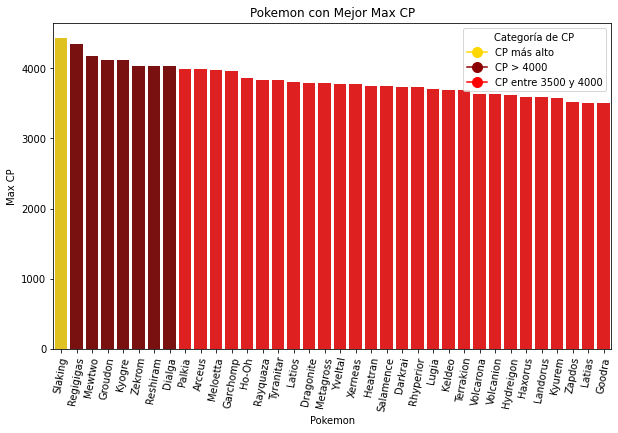

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines  # Importación necesaria para la leyenda

# Filtrar los Pokémon con Max CP > 3500
df_filtered_spark = df_pokemon.filter(col('Max CP') > 3500)

# Obtener el Pokémon con el Max CP más alto
df_MaxCP = df_filtered_spark.orderBy(col('Max CP').desc()).first()

# Función para asignar colores basada en el Max CP
def assign_color(max_cp, max_cp_value):
    if max_cp == max_cp_value:
        return 'gold'
    elif max_cp > 4000:
        return 'darkred'
    else:
        return 'red'

# Registrar el UDF (User Defined Function)
assign_color_udf = udf(lambda x: assign_color(x, df_MaxCP['Max CP']), StringType())

# Crear la columna 'Color' en el DataFrame
df_filtered_spark = df_filtered_spark.withColumn('Color', assign_color_udf(col('Max CP')))

# Convertir el DataFrame filtrado de Spark a Pandas para graficarlo
df_filtered_pandas = df_filtered_spark.toPandas()

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered_pandas, x='Pokemon', y='Max CP', palette=df_filtered_pandas['Color'])

# Configuración del gráfico
plt.title('Pokemon con Mejor Max CP')
plt.xlabel('Pokemon')
plt.ylabel('Max CP')
plt.xticks(rotation=80)

# Crear la leyenda
legend_elements = [
    mlines.Line2D([], [], marker='o', color='gold', markersize=10, label='CP más alto'),
    mlines.Line2D([], [], marker='o', color='darkred', markersize=10, label='CP > 4000'),
    mlines.Line2D([], [], marker='o', color='red', markersize=10, label='CP entre 3500 y 4000')
]
plt.legend(handles=legend_elements, title="Categoría de CP")

# Mostrar el gráfico
plt.show()


Esta tabla muestra los pokemon con mas CP. El CP en pokemon GO es una estadistica que determina cuanto dura un gimnasio en pokemon go. Cuanto más dure un pokemon en un gimnasio mas dinero te llevas por lo que pokemon con CP alto son muy útiles. Por lo que pokemon con +3500 CP son muy valiosos para defender los gimnasios


![1](https://community.cloud.databricks.com/FileStore/shared_uploads/1.jpg)


### Mejores Pokemon Defensivos


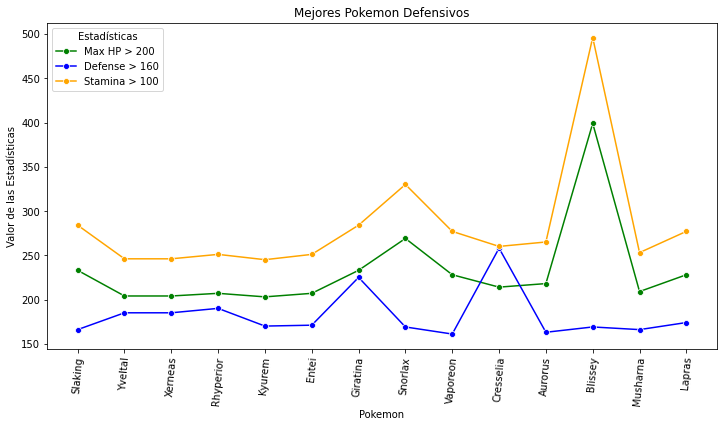

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar Pokémon según las condiciones
df_filtered_stats = df_pokemon.filter(
    (col('Max HP') > 200) & 
    (col('Defense') > 160) & 
    (col('Stamina') > 100)
)

# Convertir el DataFrame filtrado de Spark a Pandas para graficarlo
df_filtered_pandas_stats = df_filtered_stats.toPandas()

# Crear el gráfico de líneas usando Seaborn
plt.figure(figsize=(12, 6))

# Gráfico de línea para Max HP
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Max HP', label="Max HP > 200", marker='o', color='green')

# Gráfico de línea para Max Defense
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Defense', label="Defense > 160", marker='o', color='blue')

# Gráfico de línea para Stamina
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Stamina', label="Stamina > 100", marker='o', color='orange')

# Configuración del gráfico
plt.title('Mejores Pokemon Defensivos')
plt.xlabel('Pokemon')
plt.ylabel('Valor de las Estadísticas')
plt.xticks(rotation=85)

# Crear la leyenda
plt.legend(title="Estadísticas", loc="upper left")

# Mostrar el gráfico
plt.show()


Esta tabla muestra los mejores pokemon defensivos en Pokemon Go. En pokemon GO tenemos 4 estadisticas HP, Attack, Defense y Stamina. Hemos tenido en cuenta los 3 menos Attack para saber pokemon que aguanten muchos golpes y hemos llegado a la conclusion que el mejor pokemon defensivo del juego es Blissey que posee 160 de defense, 400 de max HP y 500 de estamina.

### Mejores Pokemon Ofensivos

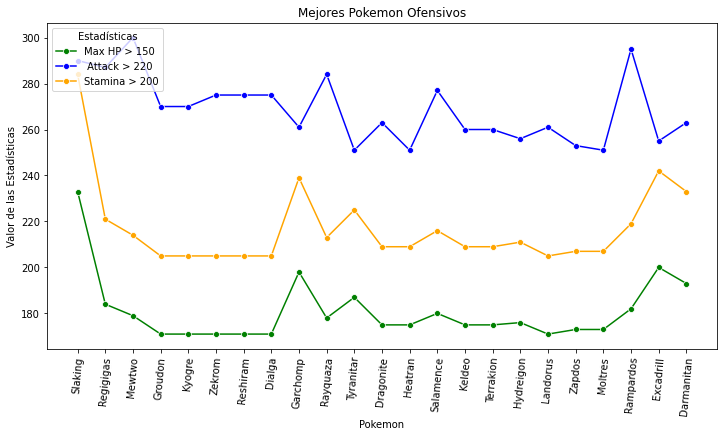

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar Pokémon según las condiciones
df_filtered_stats = df_pokemon.filter(
    (col('Max HP') > 150) & 
    (col('Attack') > 250) & 
    (col('Stamina') > 200)
)

# Convertir el DataFrame filtrado de Spark a Pandas para graficarlo
df_filtered_pandas_stats = df_filtered_stats.toPandas()

# Crear el gráfico de líneas usando Seaborn
plt.figure(figsize=(12, 6))

# Gráfico de línea para Max HP
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Max HP', label="Max HP > 150", marker='o', color='green')

# Gráfico de línea para Max Defense
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Attack', label=" Attack > 220", marker='o', color='blue')

# Gráfico de línea para Stamina
sns.lineplot(data=df_filtered_pandas_stats, x='Pokemon', y='Stamina', label="Stamina > 200", marker='o', color='orange')

# Configuración del gráfico
plt.title('Mejores Pokemon Ofensivos')
plt.xlabel('Pokemon')
plt.ylabel('Valor de las Estadísticas')
plt.xticks(rotation=85)

# Crear la leyenda
plt.legend(title="Estadísticas", loc="upper left")

# Mostrar el gráfico
plt.show()

Esta tabla muestra los mejores pokemon Ofensivos en Pokemon Go. En pokemon GO tenemos 4 estadisticas HP, Attack, Defense y Stamina. Hemos tenido en cuenta los 3 menos Defense  para saber pokemon que hagan mucho daño y que tengan la suficiente vida para aguantarlo ellos. Hemos llegado a la conclusion que el mejor pokemon ofensivo del juego son Slaking y Mewtwo, mewtwo posee muy alto ataque, siendo el mas alto del juego con 300 y buena vida (180) y stamina (210), por el otro lado Slaking posee mucha vida (220), mucha stamina (280) y buen ataque (290).


### Debilidades

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, ArrayType, StringType, StructType, StructField

# Diccionario de debilidades según la tabla de tipos
debilidades = {
    "normal": ["fighting"],
    "fire": ["water", "rock", "ground"],
    "water": ["electric", "grass"],
    "electric": ["ground"],
    "grass": ["fire", "ice", "poison", "flying", "bug"],
    "ice": ["fire", "fighting", "rock", "steel"],
    "fighting": ["flying", "psychic", "fairy"],
    "poison": ["ground", "psychic"],
    "ground": ["water", "grass", "ice"],
    "flying": ["electric", "ice", "rock"],
    "psychic": ["bug", "ghost", "dark"],
    "bug": ["fire", "flying", "rock"],
    "rock": ["water", "grass", "fighting", "ground", "steel"],
    "ghost": ["ghost", "dark"],
    "dragon": ["fairy", "ice", "dragon"],
    "dark": ["fighting", "bug", "fairy"],
    "steel": ["fire", "fighting", "ground"],
    "fairy": ["steel", "poison"]
}

# Interacciones donde un tipo es inmune o mitiga una debilidad (solo casos de inmunidad)
mitigaciones = {
    ("electric", "ground"): True,  # Electricidad no afecta a Tierra
    ("normal", "ghost"): True,  # Normal no afecta a Fantasma
    ("ground", "flying"): True,  # Tierra no afecta a Volador
    ("ghost", "normal"): True,  # Fantasma no afecta a Normal
    ("ghost", "fighting"): True,  # Lucha no afecta a Fantasma
    ("psychic", "dark"): True,  # Psiquico no afecta a Dark
    ("poison", "ground"): True,  # Veneno no afecta a Acero
    ("dragon", "fairy"): True,  # Dragon no afecta a Hada
}

# Combinaciones que mitigan debilidades (resistencias)
resistencias = {
    ("grass", "rock"): ["fire"],  # Planta + Roca pierde debilidad a Fuego
    ("water", "fire"): ["fire"],  # Agua + Fuego resiste Fuego
    ("water", "ice"): ["fire"],   # Hielo + Agua resiste Fuego
    ("dragon", "steel"): ["fairy"],  # Dragón + Acero resiste Hada
    ("ground", "flying"): ["electric"],  # Volador + Tierra es inmune a Eléctrico
    ("fighting", "ghost"): ["fighting"],  # Lucha no afecta a Fantasma
    ("poison", "ground"): ["poison"],  # Tierra es inmune a Veneno
    ("dark", "psychic"): ["psychic"],  # Psíquico es anulado por Siniestro
    ("ghost", "dark"): ["ghost"],  # Fantasma no afecta a Siniestro
}

# Crear una función para contar las debilidades de un Pokémon y devolver las debilidades y su lista
def contar_debilidades(tipo_1, tipo_2=None):
    tipo_1 = tipo_1.strip().lower() if tipo_1 else ""
    tipo_2 = tipo_2.strip().lower() if tipo_2 else None

    # Obtener las debilidades de ambos tipos
    debilidades_totales = set(debilidades.get(tipo_1, []))  # Agregar las debilidades del tipo 1
    if tipo_2:
        debilidades_totales.update(debilidades.get(tipo_2, []))  # Agregar las debilidades del tipo 2

    # Lista para almacenar los nombres de las debilidades
    debilidades_nombres = list(debilidades_totales)

    # Revisar interacciones entre los tipos y aplicar mitigaciones
    if tipo_2:
        for debilidad in debilidades_totales.copy():
            # Si existe una mitigación entre los tipos, eliminamos la debilidad
            if (debilidad, tipo_2) in mitigaciones or (tipo_2, debilidad) in mitigaciones:
                debilidades_totales.discard(debilidad)  # Eliminar la debilidad mitigada
                debilidades_nombres.remove(debilidad)  # Eliminar de la lista de nombres

    # Asegurarse de que la mitigación solo aplique a eléctrico contra tierra
    if tipo_1 == "electric" and tipo_2 == "ground":
        debilidades_totales.discard("ground")
        debilidades_nombres.remove("ground")

    # Verificar si hay resistencias que mitigan las debilidades
    if tipo_2:
        for debilidad in debilidades_totales.copy():
            # Si la combinación de tipos tiene resistencia a alguna debilidad, la eliminamos
            if (tipo_1, tipo_2) in resistencias and debilidad in resistencias[(tipo_1, tipo_2)]:
                debilidades_totales.discard(debilidad)
                debilidades_nombres.remove(debilidad)  # Eliminar de la lista de nombres

    # Retornar tanto la cantidad como los nombres de las debilidades
    return len(debilidades_totales), debilidades_nombres

# Registrar la función como UDF con múltiples columnas de salida
def contar_debilidades_udf(tipo_1, tipo_2):
    count, names = contar_debilidades(tipo_1, tipo_2)
    return (count, names)

# Definir el esquema de salida
schema = StructType([
    StructField("Debilidades Count", IntegerType(), False),
    StructField("Debilidades Names", ArrayType(StringType()), False)
])

# Crear la UDF correctamente
contar_debilidades_udf = F.udf(contar_debilidades_udf, schema)

# Asegúrate de que las columnas sean "Type 1" y "Type 2"
df_pokemon = df_pokemon.withColumnRenamed("type_1", "Type 1").withColumnRenamed("type_2", "Type 2")

# Aplicar la UDF al DataFrame y crear las nuevas columnas
df_pokemon = df_pokemon.withColumn(
    "Debilidades Info", contar_debilidades_udf(F.col("Type 1"), F.col("Type 2"))
)

# Separar las columnas de resultados, usando los nombres correctos del esquema
df_pokemon = df_pokemon.withColumn("Debilidades Count", F.col("Debilidades Info.Debilidades Count"))
df_pokemon = df_pokemon.withColumn("Debilidades Names", F.col("Debilidades Info.Debilidades Names"))

# Mostrar el DataFrame con las nuevas columnas añadidas
df_pokemon.display(truncate=False)


Pokemon Max CP Max HP Attack Defense Stamina Total Stats Is Legendary Type 1 Type 2 Debilidades Info Debilidades Count Debilidades Names region_exclusivity liga_mas_usada Slaking 4431 233 290 166 284 740 False normal none List(1, List(fighting)) 1 List(fighting) none none Regigigas 4346 184 287 210 221 718 True normal none List(1, List(fighting)) 1 List(fighting) none none Mewtwo 4178 179 300 182 214 696 True psychic none List(3, List(ghost, dark, bug)) 3 List(ghost, dark, bug) none Máster Groudon 4115 171 270 228 205 703 True ground none List(3, List(water, grass, ice)) 3 List(water, grass, ice) none none Kyogre 4115 171 270 228 205 703 True water none List(2, List(grass, electric)) 2 List(grass, electric) none none Zekrom 4038 171 275 211 205 691 True dragon electric List(3, List(dragon, fairy, ice)) 3 List(dragon, fairy, ice) none Máster Reshiram 4038 171 275 211 205 691 True dragon fire List(6, List(rock, ground, ice, fairy, water, dragon)) 6 List(rock, ground, ice, fairy, water, dragon) none none Dialga 4038 171 275 211 205 691 True steel dragon List(5, List(ground, ice, dragon, fire, fighting)) 5 List(ground, ice, dragon, fire, fighting) none Máster Palkia 3991 159 280 215 189 684 True water dragon List(4, List(grass, ice, dragon, electric)) 4 List(grass, ice, dragon, electric) none none Arceus 3989 197 238 238 237 713 True normal none List(1, List(fighting)) 1 List(fighting) none none Meloetta 3972 187 250 225 225 700 True normal psychic List(3, List(ghost, fighting, bug)) 3 List(ghost, fighting, bug) none none Garchomp 3962 198 261 193 239 693 False dragon ground List(5, List(grass, ice, fairy, water, dragon)) 5 List(grass, ice, fairy, water, dragon) none Máster Ho-Oh 3863 179 239 244 214 697 True fire flying List(4, List(rock, ice, water, electric)) 4 List(rock, ice, water, electric) none none Rayquaza 3835 178 284 170 213 667 True dragon flying List(5, List(rock, ice, fairy, dragon, electric)) 5 List(rock, ice, fairy, dragon, electric) none none Tyranitar 3834 187 251 207 225 683 False rock dark List(7, List(grass, ground, steel, fairy, bug, water, fighting)) 7 List(grass, ground, steel, fairy, bug, water, fighting) none none Latios 3812 160 268 212 190 670 True dragon psychic List(5, List(ghost, ice, fairy, bug, dragon)) 5 List(ghost, ice, fairy, bug, dragon) none none Dragonite 3792 175 263 198 209 670 False dragon flying List(5, List(rock, ice, fairy, dragon, electric)) 5 List(rock, ice, fairy, dragon, electric) none none Metagross 3791 160 257 228 190 675 False steel psychic List(5, List(ghost, ground, bug, fire, fighting)) 5 List(ghost, ground, bug, fire, fighting) none none Yveltal 3781 204 250 185 246 681 True dark flying List(6, List(rock, ice, fairy, bug, fighting, electric)) 6 List(rock, ice, fairy, bug, fighting, electric) none none Xerneas 3781 204 250 185 246 681 True fairy none List(2, List(steel, poison)) 2 List(steel, poison) none none Heatran 3754 175 251 213 209 673 True fire steel List(5, List(rock, ground, water, fire, fighting)) 5 List(rock, ground, water, fire, fighting) none none Salamence 3749 180 277 168 216 661 False dragon flying List(5, List(rock, ice, fairy, dragon, electric)) 5 List(rock, ice, fairy, dragon, electric) none none Darkrai 3739 146 285 198 172 655 True dark none List(3, List(fairy, fighting, bug)) 3 List(fairy, fighting, bug) none none Rhyperior 3733 207 241 190 251 682 False ground rock List(6, List(grass, ground, ice, steel, water, fighting)) 6 List(grass, ground, ice, steel, water, fighting) none Máster Lugia 3703 195 193 310 235 738 True psychic flying List(6, List(ghost, rock, ice, dark, bug, electric)) 6 List(ghost, rock, ice, dark, bug, electric) none Máster Keldeo 3698 175 260 192 209 661 True water fighting List(5, List(grass, flying, psychic, fairy, electric)) 5 List(grass, flying, psychic, fairy, electric) none none Terrakion 3698 175 260 192 209 661 True rock fighting List(8, List(grass, flying, ground, psychic, steel, fairy, water, fighting)) 8 List(grass, flyin

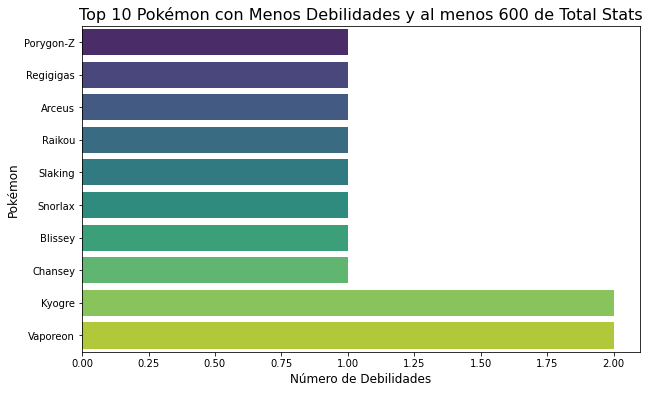

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos el DataFrame para obtener solo los Pokémon con al menos 550 en 'Total Stats'
df_filtered = df_pokemon.filter(df_pokemon["Total Stats"] >= 600)

# Nos aseguramos de trabajar con las columnas correctas
df_filtered = df_filtered.select("Pokemon", "Debilidades Count", "Debilidades Names")

# Ordenamos el DataFrame por el número de debilidades (de menor a mayor) y limitamos a los 10 primeros
df_sorted = df_filtered.orderBy("Debilidades Count").limit(10)

# Convertimos el DataFrame de PySpark a Pandas para trabajar con Matplotlib y Seaborn
df_pandas = df_sorted.toPandas()

# Graficamos los resultados con barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x="Debilidades Count", y="Pokemon", data=df_pandas, palette="viridis", orient='h')

# Títulos y etiquetas
plt.title('Top 10 Pokémon con Menos Debilidades y al menos 600 de Total Stats', fontsize=16)
plt.xlabel('Número de Debilidades', fontsize=12)
plt.ylabel('Pokémon', fontsize=12)

# Mostramos la gráfica
plt.show()


En esta tabla tenemos los 10  pokemon con menos debilidades que tienen un minimo de 600 total stats que les hagan de los mas competitivos.

### Stats Medias

In [0]:
from pyspark.sql.functions import col

# Crear la columna 'Stats Media' dividiendo 'Total Stats' entre 4
df_pokemon = df_pokemon.withColumn("Stats Media", col("Total Stats") / 4)

# Mostrar el DataFrame con la nueva columna 'Stats Media'
df_pokemon.display()


Pokemon Max CP Max HP Attack Defense Stamina Total Stats Is Legendary Type 1 Type 2 Debilidades Info Debilidades Count Debilidades Names Stats Media Slaking 4431 233 290 166 284 740 False normal none List(1, List(fighting)) 1 List(fighting) 185.0 Regigigas 4346 184 287 210 221 718 True normal none List(1, List(fighting)) 1 List(fighting) 179.5 Mewtwo 4178 179 300 182 214 696 True psychic none List(3, List(ghost, dark, bug)) 3 List(ghost, dark, bug) 174.0 Groudon 4115 171 270 228 205 703 True ground none List(3, List(water, grass, ice)) 3 List(water, grass, ice) 175.75 Kyogre 4115 171 270 228 205 703 True water none List(2, List(grass, electric)) 2 List(grass, electric) 175.75 Zekrom 4038 171 275 211 205 691 True dragon electric List(1, List(fairy)) 1 List(fairy) 172.75 Reshiram 4038 171 275 211 205 691 True dragon fire List(4, List(water, rock, fairy, ground)) 4 List(water, rock, fairy, ground) 172.75 Dialga 4038 171 275 211 205 691 True steel dragon List(3, List(fire, fighting, ground)) 3 List(fire, fighting, ground) 172.75 Palkia 3991 159 280 215 189 684 True water dragon List(2, List(grass, electric)) 2 List(grass, electric) 171.0 Arceus 3989 197 238 238 237 713 True normal none List(1, List(fighting)) 1 List(fighting) 178.25 Meloetta 3972 187 250 225 225 700 True normal psychic List(3, List(ghost, fighting, bug)) 3 List(ghost, fighting, bug) 175.0 Garchomp 3962 198 261 193 239 693 False dragon ground List(4, List(water, grass, fairy, ice)) 4 List(water, grass, fairy, ice) 173.25 Ho-Oh 3863 179 239 244 214 697 True fire flying List(4, List(rock, ice, water, electric)) 4 List(rock, ice, water, electric) 174.25 Rayquaza 3835 178 284 170 213 667 True dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) 166.75 Tyranitar 3834 187 251 207 225 683 False rock dark List(7, List(grass, ground, steel, fairy, bug, water, fighting)) 7 List(grass, ground, steel, fairy, bug, water, fighting) 170.75 Latios 3812 160 268 212 190 670 True dragon psychic List(3, List(ghost, fairy, bug)) 3 List(ghost, fairy, bug) 167.5 Dragonite 3792 175 263 198 209 670 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) 167.5 Metagross 3791 160 257 228 190 675 False steel psychic List(5, List(ghost, ground, bug, fire, fighting)) 5 List(ghost, ground, bug, fire, fighting) 168.75 Yveltal 3781 204 250 185 246 681 True dark flying List(6, List(rock, ice, fairy, bug, fighting, electric)) 6 List(rock, ice, fairy, bug, fighting, electric) 170.25 Xerneas 3781 204 250 185 246 681 True fairy none List(2, List(steel, poison)) 2 List(steel, poison) 170.25 Heatran 3754 175 251 213 209 673 True fire steel List(5, List(rock, ground, water, fire, fighting)) 5 List(rock, ground, water, fire, fighting) 168.25 Salamence 3749 180 277 168 216 661 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) 165.25 Darkrai 3739 146 285 198 172 655 True dark none List(3, List(fairy, fighting, bug)) 3 List(fairy, fighting, bug) 163.75 Rhyperior 3733 207 241 190 251 682 False ground rock List(6, List(grass, ground, ice, steel, water, fighting)) 6 List(grass, ground, ice, steel, water, fighting) 170.5 Lugia 3703 195 193 310 235 738 True psychic flying List(6, List(ghost, rock, ice, dark, bug, electric)) 6 List(ghost, rock, ice, dark, bug, electric) 184.5 Keldeo 3698 175 260 192 209 661 True water fighting List(5, List(grass, flying, psychic, fairy, electric)) 5 List(grass, flying, psychic, fairy, electric) 165.25 Terrakion 3698 175 260 192 209 661 True rock fighting List(8, List(grass, flying, ground, psychic, steel, fairy, water, fighting)) 8 List(grass, flying, ground, psychic, steel, fairy, water, fighting) 165.25 Volcarona 3632 166 264 189 198 651 False bug fire List(5, List(flying, rock, ground, water, fire)) 5 List(flying, rock, ground, water, fire) 162.75 Volcanion 3628 160 252 216 190 658 True fire water List(5, List(grass, rock, ground, water, electric)) 5 List

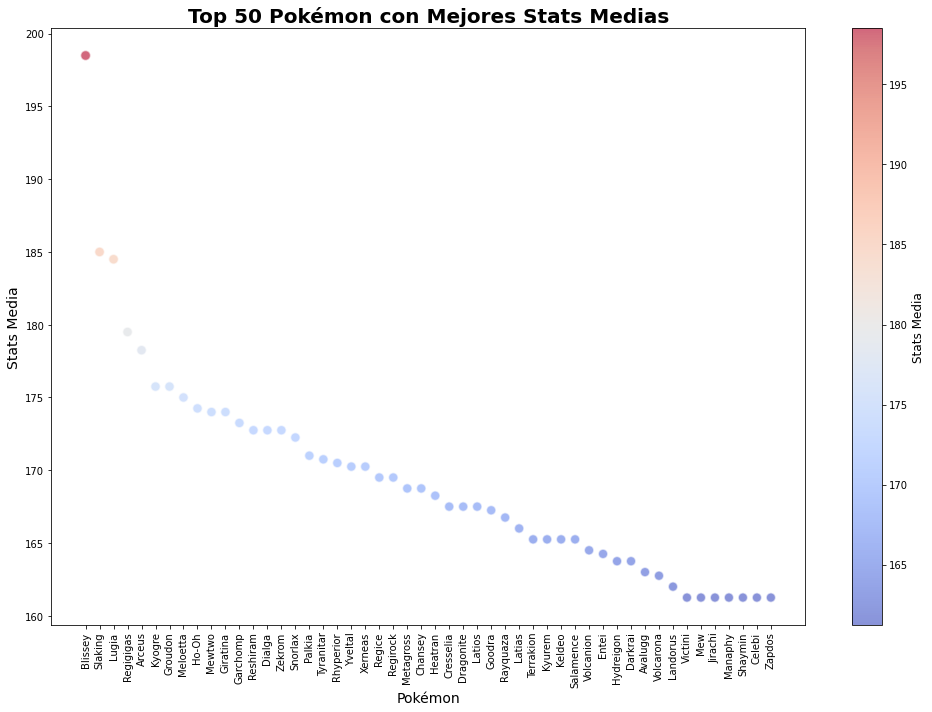

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convertir el DataFrame de PySpark a Pandas para trabajar con Matplotlib
df_pandas = df_pokemon.select("Pokemon", "Stats Media", "Max CP").toPandas()

# Ordenamos el DataFrame por 'Stats Media' en orden descendente para obtener los mejores Pokémon
df_top_50 = df_pandas.sort_values(by="Stats Media", ascending=False).head(50)

# Configuración de la gráfica
plt.figure(figsize=(14, 10))

# Normalizamos el tamaño de las burbujas para que no se superpongan demasiado
# Utilizamos Stats Media para determinar el tamaño
bubble_size = np.sqrt(df_top_50['Stats Media'] * 50)  # El multiplicador ajusta el tamaño de la burbuja
bubble_color = df_top_50['Stats Media']  # Usamos Stats Media para el color
bubble_cmap = "coolwarm"  # Usamos un mapa de colores atractivo para la visualización

# Crear la gráfica de burbujas
scatter = plt.scatter(
    x=df_top_50['Pokemon'], y=df_top_50['Stats Media'], 
    s=bubble_size, c=bubble_color, cmap=bubble_cmap, alpha=0.6, edgecolors="w", linewidth=1.5
)

# Títulos y etiquetas
plt.title("Top 50 Pokémon con Mejores Stats Medias", fontsize=20, fontweight='bold')
plt.xlabel("Pokémon", fontsize=14)
plt.ylabel("Stats Media", fontsize=14)

# Rotar las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=90)

# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Stats Media', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


En esta tabla tenemos los 50 pokemon con mejores stats medias. Como podemos observar Blissey no solo es el mejor pokemon defensivo sino que tiene las mejores stats media del juego

### Regionales

In [0]:
from pyspark.sql.functions import when, col

# Crear una columna para "region_exclusivity"
df_pokemon = df_pokemon.withColumn(
    "region_exclusivity",
    when(df_pokemon.Pokemon == "Farfetch’d", "Corea del Sur, Japón, Taiwán, Hong Kong")
    .when(df_pokemon.Pokemon == "Kangaskhan", "Australia")
    .when(df_pokemon.Pokemon == "Mr. Mime", "Europa")
    .when(df_pokemon.Pokemon == "Tauros", "EE.UU. y sur de Canadá")
    .when(df_pokemon.Pokemon == "Heracross", "América del Sur")
    .when(df_pokemon.Pokemon == "Corsola", "Costas (31°N-26°S)")
    .when(df_pokemon.Pokemon == "Tropius", "África y sur de España")
    .when(df_pokemon.Pokemon == "Relicanth", "Nueva Zelanda, Fiyi, Vanuatu")
    .when(df_pokemon.Pokemon == "Zangoose", "Hemisferio Oeste")
    .when(df_pokemon.Pokemon == "Seviper", "Hemisferio Este")
    .when(df_pokemon.Pokemon == "Pachirisu", "Canadá, Rusia, Alaska")
    .when(df_pokemon.Pokemon == "Chatot", "Hemisferio Sur")
    .when(df_pokemon.Pokemon == "Carnivine", "Sureste de EE.UU.")
    .when(df_pokemon.Pokemon == "Uxie", "Asia")
    .when(df_pokemon.Pokemon == "Pansage", "Asia")
    .when(df_pokemon.Pokemon == "Mesprit", "Europa y África")
    .when(df_pokemon.Pokemon == "Pansear", "Europa y África")
    .when(df_pokemon.Pokemon == "Azelf", "América")
    .when(df_pokemon.Pokemon == "Panpour", "América")
    .when(df_pokemon.Pokemon == "Oricorio (Baile Style)", "América")
    .when(df_pokemon.Pokemon == "Sigilyph", "Grecia y Egipto")
    .when(df_pokemon.Pokemon == "Maractus", "Centro y Sudamérica")
    .when(df_pokemon.Pokemon == "Oricorio (Pom-Pom Style)", "Hawái")
    .otherwise("none")
)

# Ahora utilizando el diccionario 'regional_pokemon'
for pokemon, region in regional_pokemon.items():
    df_pokemon = df_pokemon.withColumn(
        "region_exclusivity",
        when(col("Pokemon") == pokemon, region).otherwise(col("region_exclusivity"))
    )

# Mostrar el DataFrame actualizado (opcional)
df_pokemon.display()


Pokemon Max CP Max HP Attack Defense Stamina Total Stats Is Legendary Type 1 Type 2 Debilidades Info Debilidades Count Debilidades Names region_exclusivity Slaking 4431 233 290 166 284 740 False normal none List(1, List(fighting)) 1 List(fighting) none Regigigas 4346 184 287 210 221 718 True normal none List(1, List(fighting)) 1 List(fighting) none Mewtwo 4178 179 300 182 214 696 True psychic none List(3, List(ghost, dark, bug)) 3 List(ghost, dark, bug) none Groudon 4115 171 270 228 205 703 True ground none List(3, List(water, grass, ice)) 3 List(water, grass, ice) none Kyogre 4115 171 270 228 205 703 True water none List(2, List(grass, electric)) 2 List(grass, electric) none Zekrom 4038 171 275 211 205 691 True dragon electric List(1, List(fairy)) 1 List(fairy) none Reshiram 4038 171 275 211 205 691 True dragon fire List(4, List(water, rock, fairy, ground)) 4 List(water, rock, fairy, ground) none Dialga 4038 171 275 211 205 691 True steel dragon List(3, List(fire, fighting, ground)) 3 List(fire, fighting, ground) none Palkia 3991 159 280 215 189 684 True water dragon List(2, List(grass, electric)) 2 List(grass, electric) none Arceus 3989 197 238 238 237 713 True normal none List(1, List(fighting)) 1 List(fighting) none Meloetta 3972 187 250 225 225 700 True normal psychic List(3, List(ghost, fighting, bug)) 3 List(ghost, fighting, bug) none Garchomp 3962 198 261 193 239 693 False dragon ground List(4, List(water, grass, fairy, ice)) 4 List(water, grass, fairy, ice) none Ho-Oh 3863 179 239 244 214 697 True fire flying List(4, List(rock, ice, water, electric)) 4 List(rock, ice, water, electric) none Rayquaza 3835 178 284 170 213 667 True dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none Tyranitar 3834 187 251 207 225 683 False rock dark List(7, List(grass, ground, steel, fairy, bug, water, fighting)) 7 List(grass, ground, steel, fairy, bug, water, fighting) none Latios 3812 160 268 212 190 670 True dragon psychic List(3, List(ghost, fairy, bug)) 3 List(ghost, fairy, bug) none Dragonite 3792 175 263 198 209 670 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none Metagross 3791 160 257 228 190 675 False steel psychic List(5, List(ghost, ground, bug, fire, fighting)) 5 List(ghost, ground, bug, fire, fighting) none Yveltal 3781 204 250 185 246 681 True dark flying List(6, List(rock, ice, fairy, bug, fighting, electric)) 6 List(rock, ice, fairy, bug, fighting, electric) none Xerneas 3781 204 250 185 246 681 True fairy none List(2, List(steel, poison)) 2 List(steel, poison) none Heatran 3754 175 251 213 209 673 True fire steel List(5, List(rock, ground, water, fire, fighting)) 5 List(rock, ground, water, fire, fighting) none Salamence 3749 180 277 168 216 661 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none Darkrai 3739 146 285 198 172 655 True dark none List(3, List(fairy, fighting, bug)) 3 List(fairy, fighting, bug) none Rhyperior 3733 207 241 190 251 682 False ground rock List(6, List(grass, ground, ice, steel, water, fighting)) 6 List(grass, ground, ice, steel, water, fighting) none Lugia 3703 195 193 310 235 738 True psychic flying List(6, List(ghost, rock, ice, dark, bug, electric)) 6 List(ghost, rock, ice, dark, bug, electric) none Keldeo 3698 175 260 192 209 661 True water fighting List(5, List(grass, flying, psychic, fairy, electric)) 5 List(grass, flying, psychic, fairy, electric) none Terrakion 3698 175 260 192 209 661 True rock fighting List(8, List(grass, flying, ground, psychic, steel, fairy, water, fighting)) 8 List(grass, flying, ground, psychic, steel, fairy, water, fighting) none Volcarona 3632 166 264 189 198 651 False bug fire List(5, List(flying, rock, ground, water, fire)) 5 List(flying, rock, ground, water, fire) none Volcanion 3628 160 252 216 190 658 True fire water List(5, List(grass, rock, ground, water, electric)) 5 List(grass, rock, ground, water, electric) n

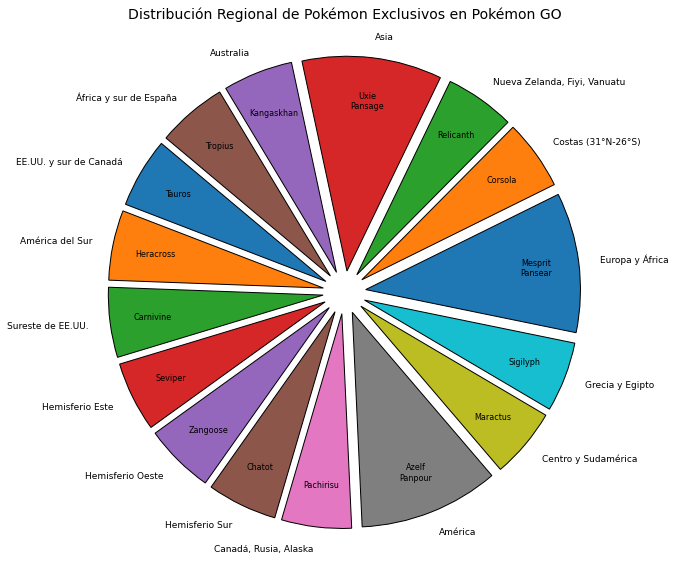

In [0]:
import matplotlib.pyplot as plt
import math
from pyspark.sql import functions as F

# Agrupar por 'region_exclusivity' y contar cuántos Pokémon hay en cada región
region_counts = df_pokemon.groupBy("region_exclusivity").count()

# Filtrar las regiones que no son 'none'
region_counts_filtered = region_counts.filter(region_counts.region_exclusivity != 'none')

# Recoger los resultados como una lista para usar en el gráfico
region_counts_data = region_counts_filtered.collect()

# Preparar las etiquetas (regiones) y los tamaños (conteos)
labels = [row['region_exclusivity'] for row in region_counts_data]
sizes = [row['count'] for row in region_counts_data]

# Crear un diccionario de Pokémon por región para mostrar en el gráfico
pokemon_by_region = df_pokemon.groupBy('region_exclusivity').agg(F.collect_list('Pokemon').alias('pokemons')).collect()
pokemon_dict = {row['region_exclusivity']: row['pokemons'] for row in pokemon_by_region}

# Crear la visualización con quesitos
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico de pizza sin mostrar los porcentajes
wedges, texts = ax.pie(
    sizes,
    explode=[0.1] * len(sizes),  # Ajusta la explosión de los quesitos
    labels=labels,
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 9}
)

# Añadir los Pokémon exclusivos dentro de cada quesito
for i, wedge in enumerate(wedges):
    # Calcular el ángulo medio del sector para posicionar los textos
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.9 * wedge.r * math.cos(math.radians(angle))  # Colocar los nombres más cerca del centro
    y = 0.9 * wedge.r * math.sin(math.radians(angle))  # Colocar los nombres más cerca del centro
    
    # Obtener la lista de Pokémon exclusivos de esa región
    pokemon_list = "\n".join(pokemon_dict[labels[i]])
    
    # Añadir texto adicional al gráfico con los Pokémon exclusivos dentro del sector
    ax.text(
        x, y, pokemon_list, ha='center', va='center', fontsize=8, color='black', wrap=True
    )

# Configuración final
ax.set_title("Distribución Regional de Pokémon Exclusivos en Pokémon GO", fontsize=14)
plt.tight_layout()
plt.show()


En esta tabla podemos observar los pokemon más dificiles de obtener ya que son exclusivos de cierta región. Se aprecia el pokemón exclusivo de cada región.

### Mas usados por liga

In [0]:
from pyspark.sql.functions import col, when

# Diccionario con Pokémon y las ligas donde son más utilizados
pvp_usage_dict = {
    'Altaria': 'Super',
    'Azumarill': 'Super',
    'Galarian Stunfisk': 'Super',
    'Registeel': 'Super',
    'Deoxys (Defensive Form)': 'Super',
    'Umbreon': 'Super',
    'Bastiodon': 'Super',
    'Skarmory': 'Super',
    'Wigglytuff': 'Super',
    'Shieldson': 'Super',
    'Giratina (Altered Form)': 'Ultra',
    'Togekiss': 'Ultra',
    'Cresselia': 'Ultra',
    'Swampert': 'Ultra',
    'Galarian Moltres': 'Ultra',
    'Toxicroak': 'Ultra',
    'Charizard': 'Ultra',
    'Snorlax': 'Ultra',
    'Mewtwo': 'Máster',
    'Dialga': 'Máster',
    'Melmetal': 'Máster',
    'Giratina (Origin Form)': 'Máster',
    'Lugia': 'Máster',
    'Zekrom': 'Máster',
    'Rhyperior': 'Máster',
    'Excadrill': 'Máster',
    'Garchomp': 'Máster'
}

# Crear la columna "liga_mas_usada" usando condiciones 'when' encadenadas
df_pokemon = df_pokemon.withColumn(
    "liga_mas_usada",
    when(col("Pokemon") == 'Altaria', 'Super')
    .when(col("Pokemon") == 'Azumarill', 'Super')
    .when(col("Pokemon") == 'Galarian Stunfisk', 'Super')
    .when(col("Pokemon") == 'Registeel', 'Super')
    .when(col("Pokemon") == 'Deoxys (Defensive Form)', 'Super')
    .when(col("Pokemon") == 'Umbreon', 'Super')
    .when(col("Pokemon") == 'Bastiodon', 'Super')
    .when(col("Pokemon") == 'Skarmory', 'Super')
    .when(col("Pokemon") == 'Wigglytuff', 'Super')
    .when(col("Pokemon") == 'Shieldson', 'Super')
    .when(col("Pokemon") == 'Giratina (Altered Form)', 'Ultra')
    .when(col("Pokemon") == 'Togekiss', 'Ultra')
    .when(col("Pokemon") == 'Cresselia', 'Ultra')
    .when(col("Pokemon") == 'Swampert', 'Ultra')
    .when(col("Pokemon") == 'Galarian Moltres', 'Ultra')
    .when(col("Pokemon") == 'Toxicroak', 'Ultra')
    .when(col("Pokemon") == 'Charizard', 'Ultra')
    .when(col("Pokemon") == 'Snorlax', 'Ultra')
    .when(col("Pokemon") == 'Mewtwo', 'Máster')
    .when(col("Pokemon") == 'Dialga', 'Máster')
    .when(col("Pokemon") == 'Melmetal', 'Máster')
    .when(col("Pokemon") == 'Giratina (Origin Form)', 'Máster')
    .when(col("Pokemon") == 'Lugia', 'Máster')
    .when(col("Pokemon") == 'Zekrom', 'Máster')
    .when(col("Pokemon") == 'Rhyperior', 'Máster')
    .when(col("Pokemon") == 'Excadrill', 'Máster')
    .when(col("Pokemon") == 'Garchomp', 'Máster')
    .otherwise('none')  # Para los Pokémon no incluidos en el diccionario, asignar 'none'
)

# Verificar los resultados
df_pokemon.display()

Pokemon Max CP Max HP Attack Defense Stamina Total Stats Is Legendary Type 1 Type 2 Debilidades Info Debilidades Count Debilidades Names region_exclusivity liga_mas_usada Slaking 4431 233 290 166 284 740 False normal none List(1, List(fighting)) 1 List(fighting) none none Regigigas 4346 184 287 210 221 718 True normal none List(1, List(fighting)) 1 List(fighting) none none Mewtwo 4178 179 300 182 214 696 True psychic none List(3, List(ghost, dark, bug)) 3 List(ghost, dark, bug) none Máster Groudon 4115 171 270 228 205 703 True ground none List(3, List(water, grass, ice)) 3 List(water, grass, ice) none none Kyogre 4115 171 270 228 205 703 True water none List(2, List(grass, electric)) 2 List(grass, electric) none none Zekrom 4038 171 275 211 205 691 True dragon electric List(1, List(fairy)) 1 List(fairy) none Máster Reshiram 4038 171 275 211 205 691 True dragon fire List(4, List(water, rock, fairy, ground)) 4 List(water, rock, fairy, ground) none none Dialga 4038 171 275 211 205 691 True steel dragon List(3, List(fire, fighting, ground)) 3 List(fire, fighting, ground) none Máster Palkia 3991 159 280 215 189 684 True water dragon List(2, List(grass, electric)) 2 List(grass, electric) none none Arceus 3989 197 238 238 237 713 True normal none List(1, List(fighting)) 1 List(fighting) none none Meloetta 3972 187 250 225 225 700 True normal psychic List(3, List(ghost, fighting, bug)) 3 List(ghost, fighting, bug) none none Garchomp 3962 198 261 193 239 693 False dragon ground List(4, List(water, grass, fairy, ice)) 4 List(water, grass, fairy, ice) none Máster Ho-Oh 3863 179 239 244 214 697 True fire flying List(4, List(rock, ice, water, electric)) 4 List(rock, ice, water, electric) none none Rayquaza 3835 178 284 170 213 667 True dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none none Tyranitar 3834 187 251 207 225 683 False rock dark List(7, List(grass, ground, steel, fairy, bug, water, fighting)) 7 List(grass, ground, steel, fairy, bug, water, fighting) none none Latios 3812 160 268 212 190 670 True dragon psychic List(3, List(ghost, fairy, bug)) 3 List(ghost, fairy, bug) none none Dragonite 3792 175 263 198 209 670 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none none Metagross 3791 160 257 228 190 675 False steel psychic List(5, List(ghost, ground, bug, fire, fighting)) 5 List(ghost, ground, bug, fire, fighting) none none Yveltal 3781 204 250 185 246 681 True dark flying List(6, List(rock, ice, fairy, bug, fighting, electric)) 6 List(rock, ice, fairy, bug, fighting, electric) none none Xerneas 3781 204 250 185 246 681 True fairy none List(2, List(steel, poison)) 2 List(steel, poison) none none Heatran 3754 175 251 213 209 673 True fire steel List(5, List(rock, ground, water, fire, fighting)) 5 List(rock, ground, water, fire, fighting) none none Salamence 3749 180 277 168 216 661 False dragon flying List(4, List(rock, fairy, electric, ice)) 4 List(rock, fairy, electric, ice) none none Darkrai 3739 146 285 198 172 655 True dark none List(3, List(fairy, fighting, bug)) 3 List(fairy, fighting, bug) none none Rhyperior 3733 207 241 190 251 682 False ground rock List(6, List(grass, ground, ice, steel, water, fighting)) 6 List(grass, ground, ice, steel, water, fighting) none Máster Lugia 3703 195 193 310 235 738 True psychic flying List(6, List(ghost, rock, ice, dark, bug, electric)) 6 List(ghost, rock, ice, dark, bug, electric) none Máster Keldeo 3698 175 260 192 209 661 True water fighting List(5, List(grass, flying, psychic, fairy, electric)) 5 List(grass, flying, psychic, fairy, electric) none none Terrakion 3698 175 260 192 209 661 True rock fighting List(8, List(grass, flying, ground, psychic, steel, fairy, water, fighting)) 8 List(grass, flying, ground, psychic, steel, fairy, water, fighting) none none Volcarona 3632 166 264 189 198 651 False bug fire List(5, List(flying, rock, ground, water, fire)) 5 List(flying, rock, ground, water

In [0]:
# Filtramos para quedarnos con los 10 Pokémon más usados por liga
top_pokemon_by_liga_data = top_pokemon_by_liga.collect()

# Mostrar los resultados como lista
def mostrar_top_10_pokemon(liga):
    # Filtramos los Pokémon de la liga
    liga_data = [row for row in top_pokemon_by_liga_data if row['liga_mas_usada'] == liga]
    
    # Mostrar los 10 Pokémon más usados
    print(f"Top 10 Pokémon más usados en la Liga {liga}:")
    for idx, row in enumerate(liga_data, start=1):
        print(f"{idx}. {row['Pokemon']} - Usos: {row['count']}")

# Mostrar los resultados por cada liga
mostrar_top_10_pokemon('Super')
mostrar_top_10_pokemon('Ultra')
mostrar_top_10_pokemon('Máster')


Top 10 Pokémon más usados en la Liga Super:
1. Wigglytuff - Usos: 1
2. Azumarill - Usos: 1
3. Registeel - Usos: 1
4. Skarmory - Usos: 1
5. Bastiodon - Usos: 1
6. Altaria - Usos: 1
7. Umbreon - Usos: 1
Top 10 Pokémon más usados en la Liga Ultra:
1. Togekiss - Usos: 1
2. Snorlax - Usos: 1
3. Cresselia - Usos: 1
4. Toxicroak - Usos: 1
5. Charizard - Usos: 1
6. Swampert - Usos: 1
Top 10 Pokémon más usados en la Liga Máster:
1. Garchomp - Usos: 1
2. Rhyperior - Usos: 1
3. Mewtwo - Usos: 1
4. Lugia - Usos: 1
5. Dialga - Usos: 1
6. Excadrill - Usos: 1
7. Zekrom - Usos: 1


### Mas usados stats

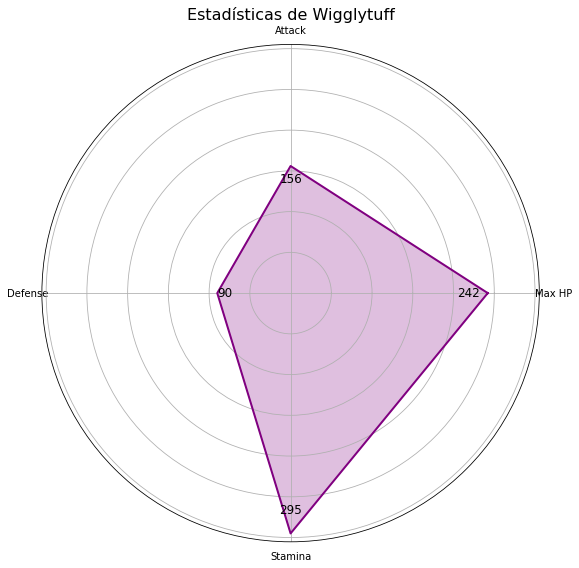

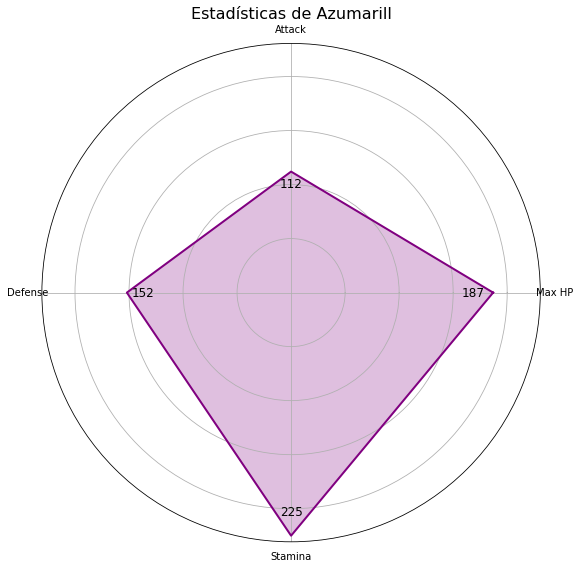

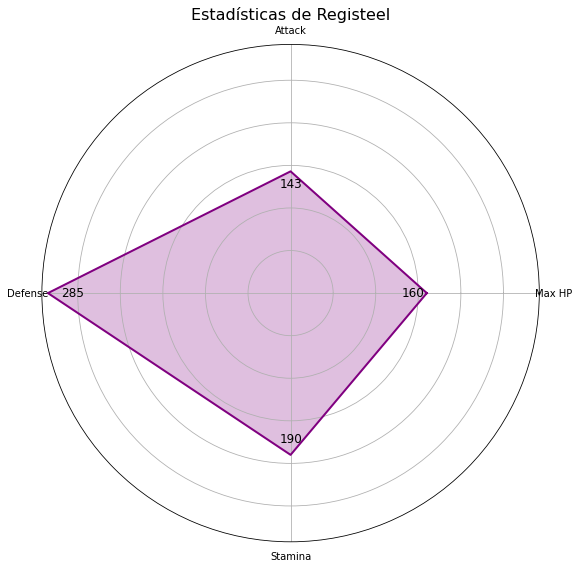

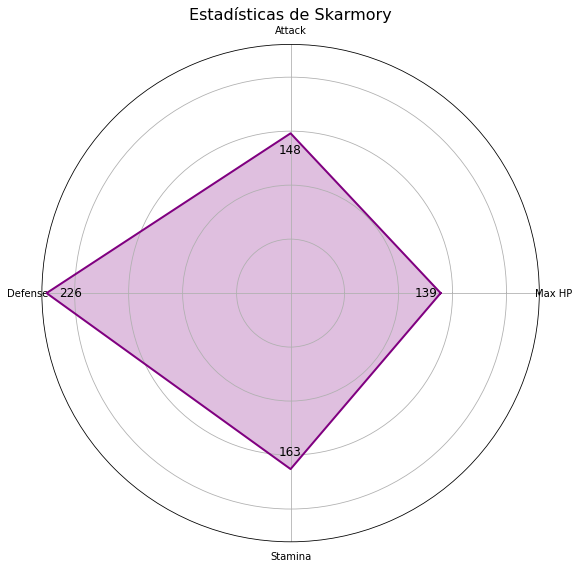

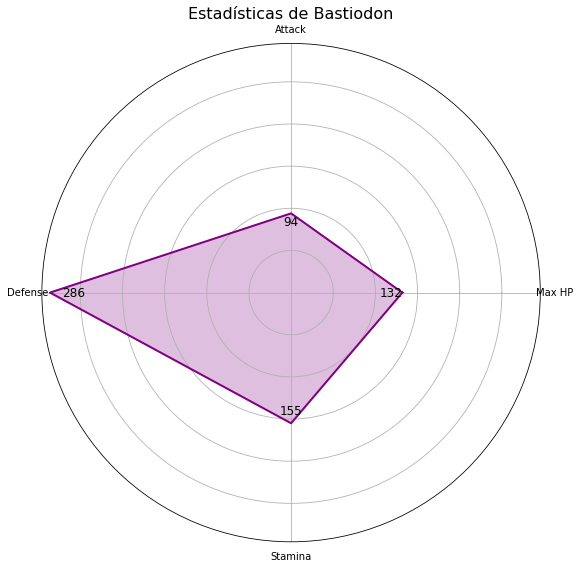

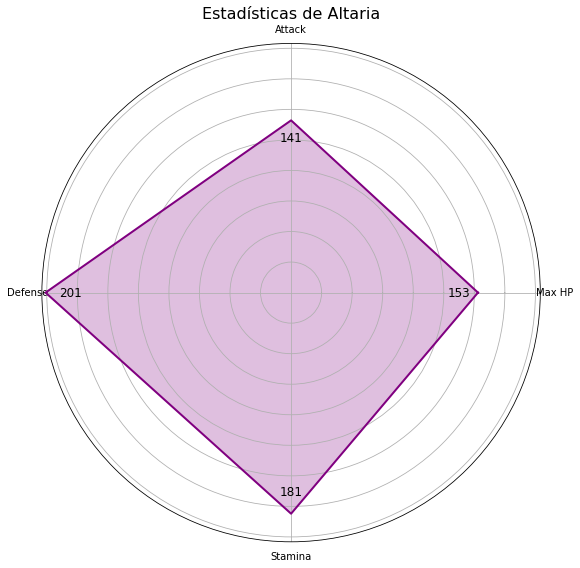

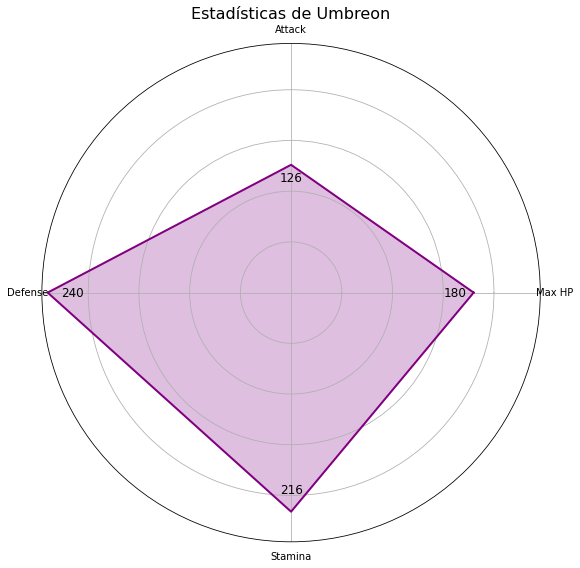

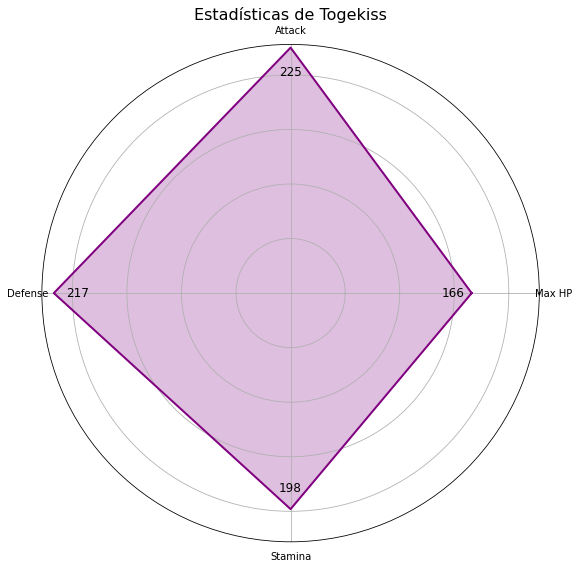

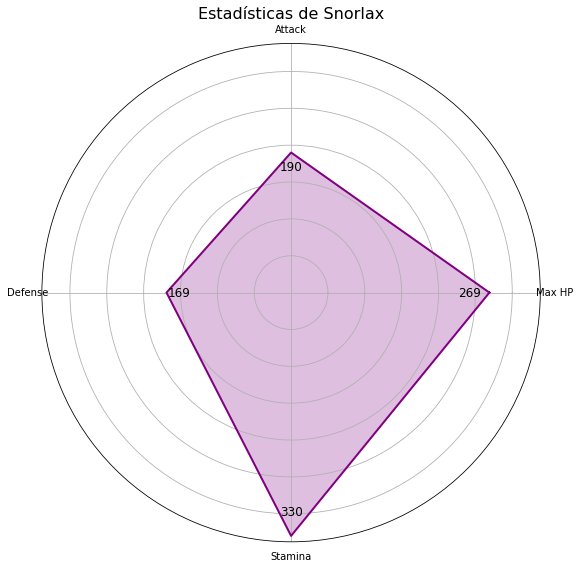

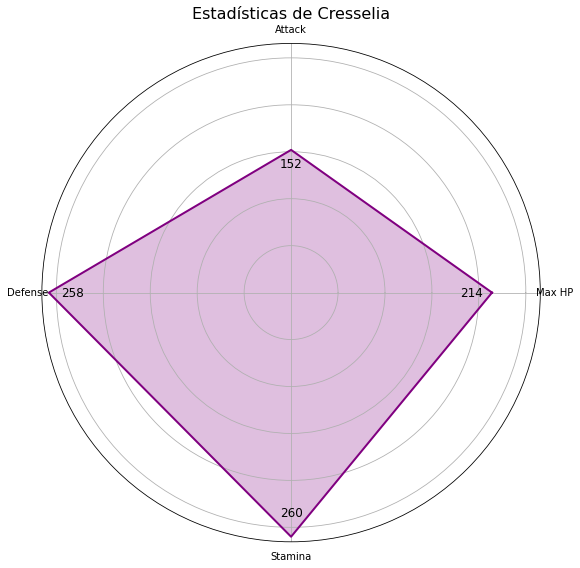

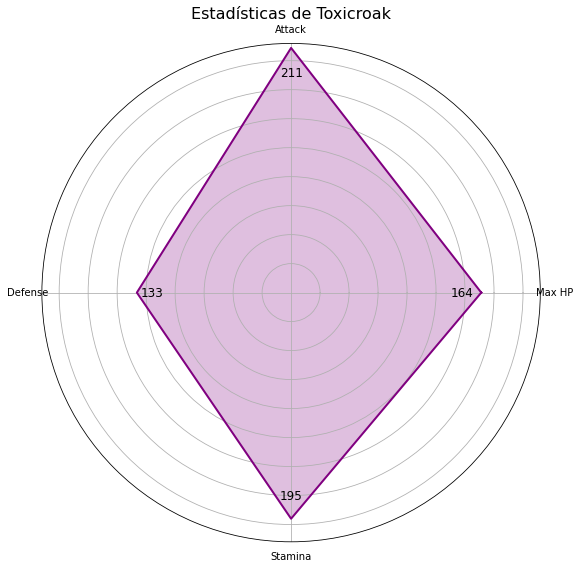

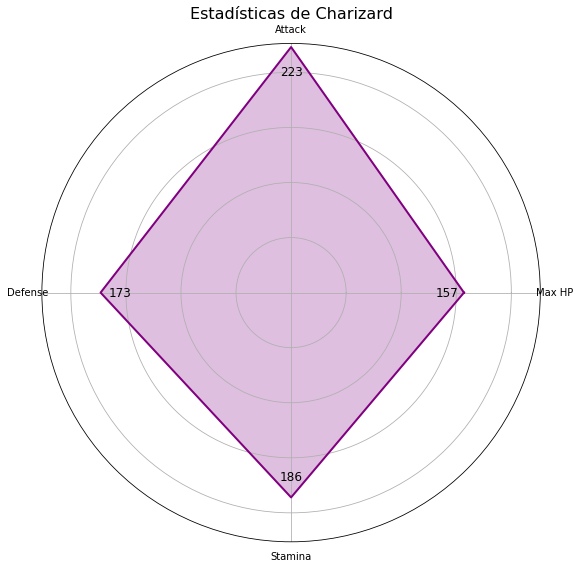

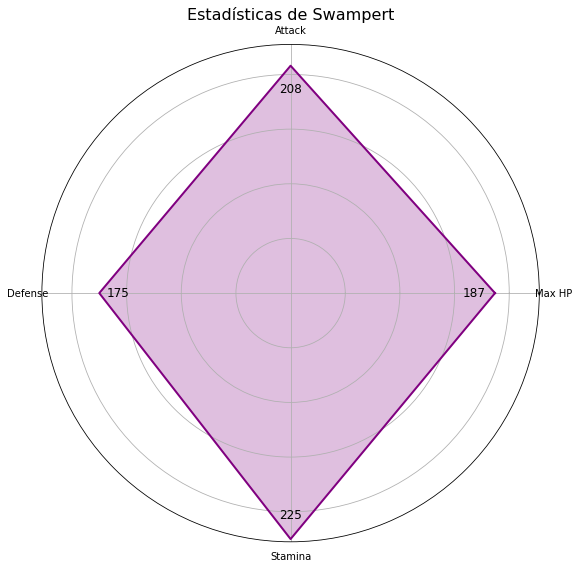

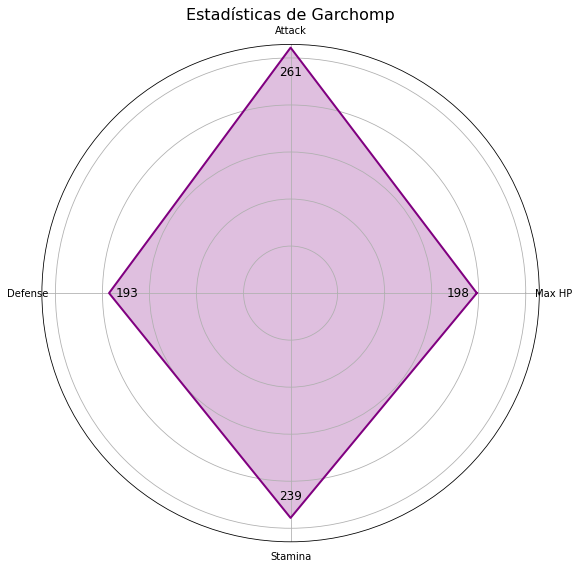

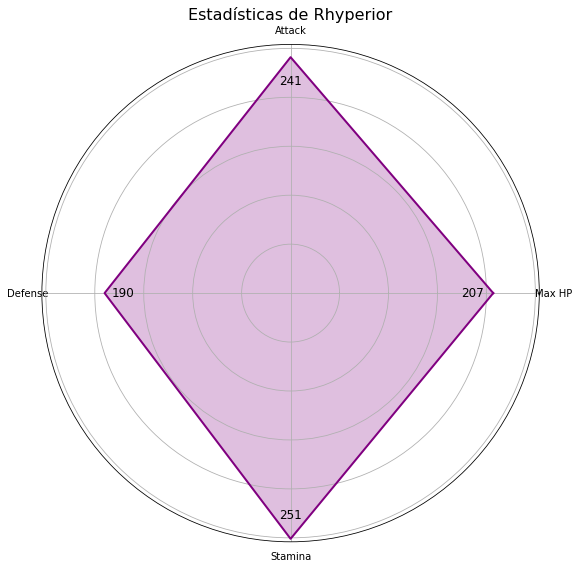

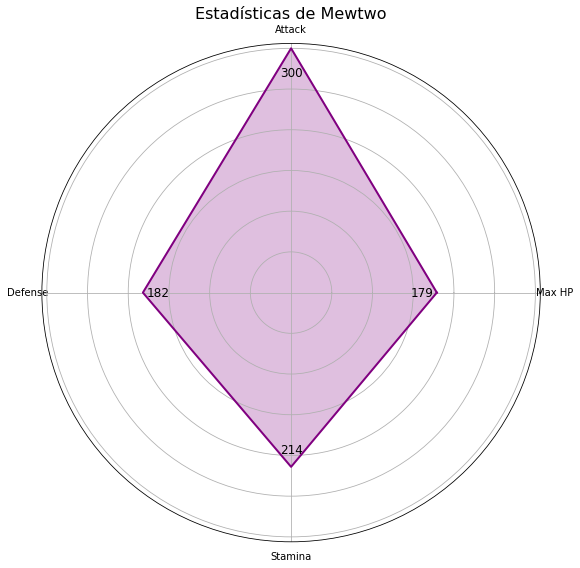

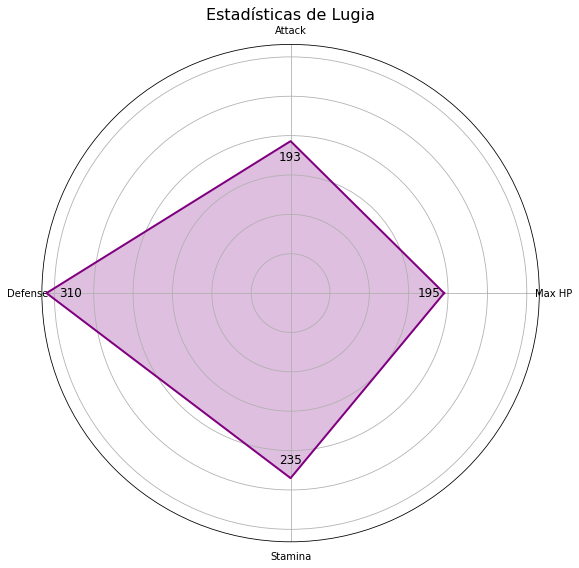

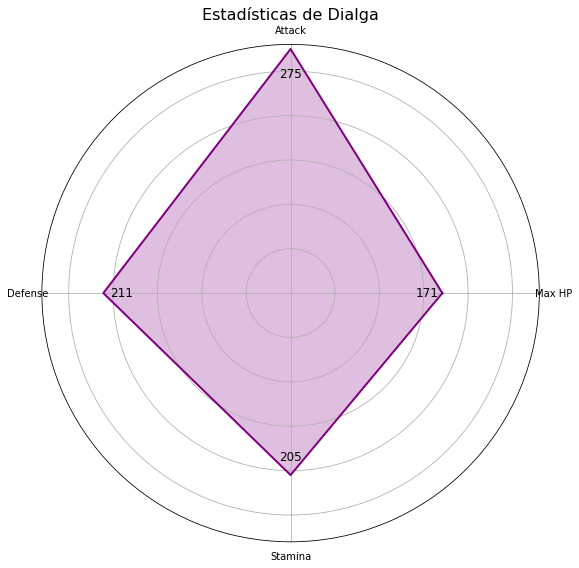

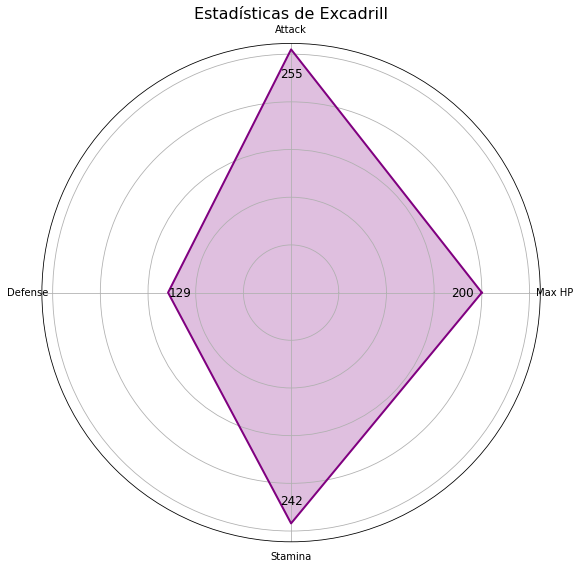

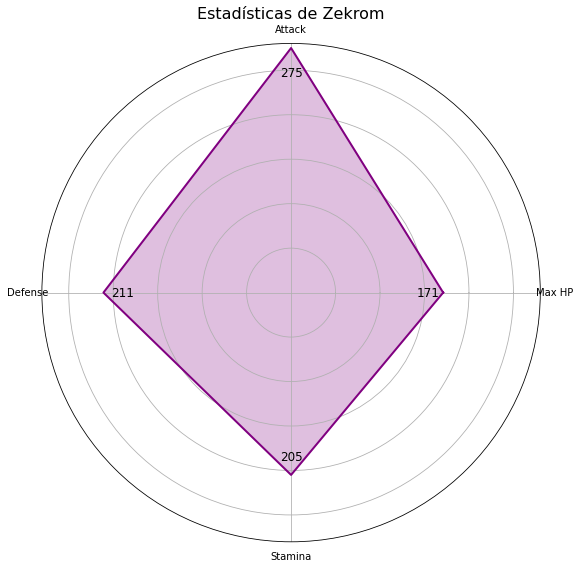

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Lista de Pokémon y sus estadísticas de interés
pokemons = [
    'Wigglytuff', 'Azumarill', 'Registeel', 'Skarmory', 'Bastiodon', 'Altaria', 'Umbreon',
    'Togekiss', 'Snorlax', 'Cresselia', 'Toxicroak', 'Charizard', 'Swampert',
    'Garchomp', 'Rhyperior', 'Mewtwo', 'Lugia', 'Dialga', 'Excadrill', 'Zekrom'
]

# Función para crear el gráfico radial para las estadísticas
def generar_grafico_radial(pokemon_name, stats):
    # Etiquetas para las estadísticas
    labels = list(stats.keys())
    values = list(stats.values())

    # Número de categorías (estadísticas)
    num_vars = len(labels)

    # Ángulos de los ejes (dividiendo el círculo)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]  # Hacer que el gráfico sea circular (cerrar la curva)
    angles += angles[:1]  # Lo mismo para los ángulos

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Dibujar el gráfico radial
    ax.fill(angles, values, color='purple', alpha=0.25)
    ax.plot(angles, values, color='purple', linewidth=2)  # Línea de contorno

    # Etiquetas de las estadísticas
    ax.set_yticklabels([])  # Sin etiquetas en el eje radial
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, ha='center')

    # Etiquetas con los valores de las estadísticas dentro de los ejes
    for i in range(len(values) - 1):
        # Reducir el radio para mover los valores dentro del gráfico
        ax.text(angles[i], values[i] * 0.9, f'{values[i]:.0f}', color='black', ha='center', va='center', fontsize=12)

    # Título
    ax.set_title(f'Estadísticas de {pokemon_name}', size=16)

    # Ajustar el diseño y mostrar la visualización
    plt.tight_layout()
    plt.show()

# Recorrer cada Pokémon de la lista para generar su gráfico radial
for pokemon_name in pokemons:
    # Filtrar los datos del Pokémon en el DataFrame
    pokemon_data = df_pokemon.filter(df_pokemon.Pokemon == pokemon_name).select(
        'Max HP', 'Attack', 'Defense', 'Stamina'
    ).collect()

    # Convertir los datos a un diccionario
    if pokemon_data:
        pokemon_data = pokemon_data[0]  # Obtener el primer (y único) resultado
        stats = {
            "Max HP": pokemon_data['Max HP'],
            "Attack": pokemon_data['Attack'],
            "Defense": pokemon_data['Defense'],
            "Stamina": pokemon_data['Stamina']
        }

        # Generar el gráfico radial para cada Pokémon
        generar_grafico_radial(pokemon_name, stats)
    else:
        print(f"No se encontraron datos para {pokemon_name}")


### Media Total Stats por Combinación de Tipos

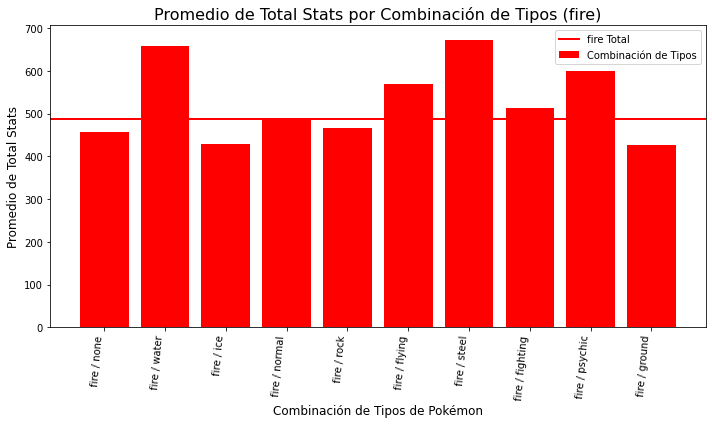

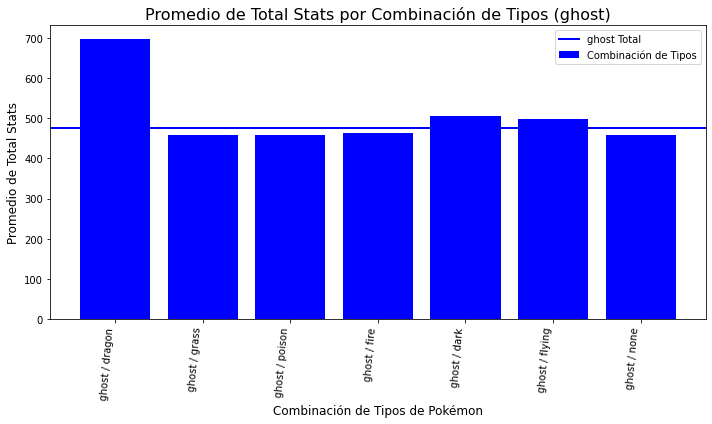

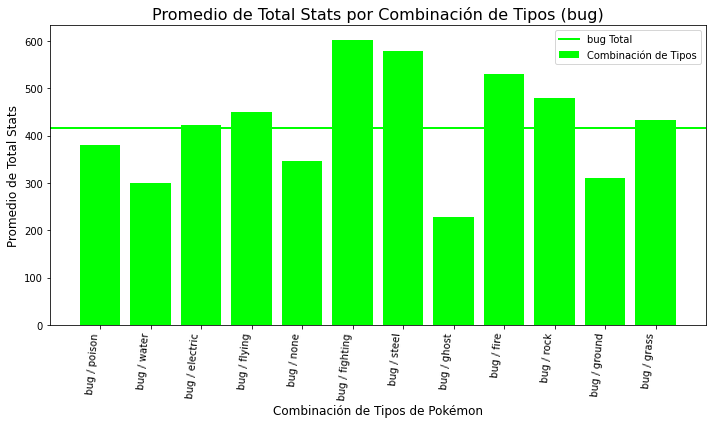

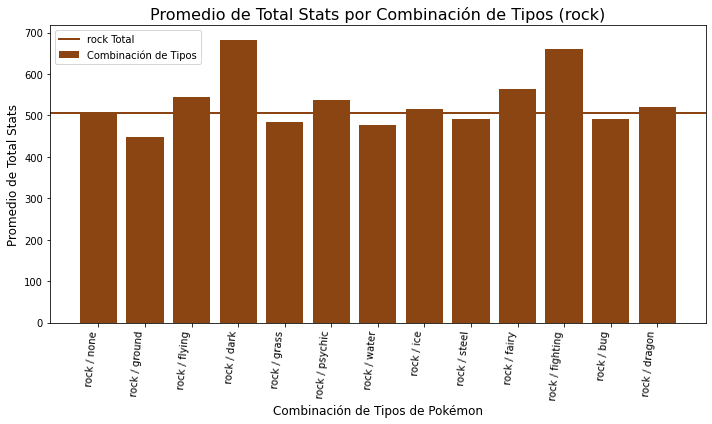

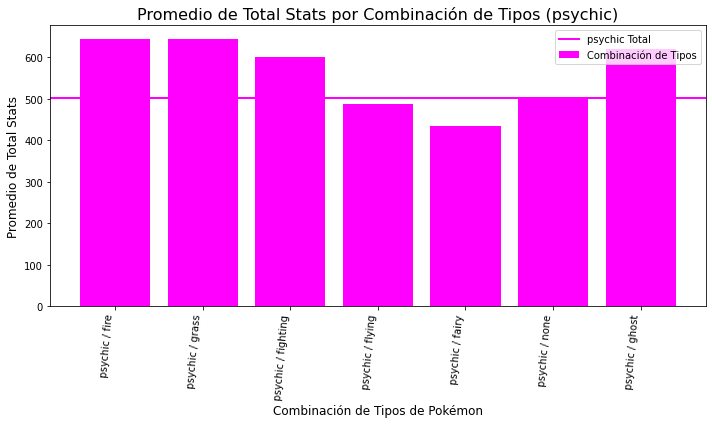

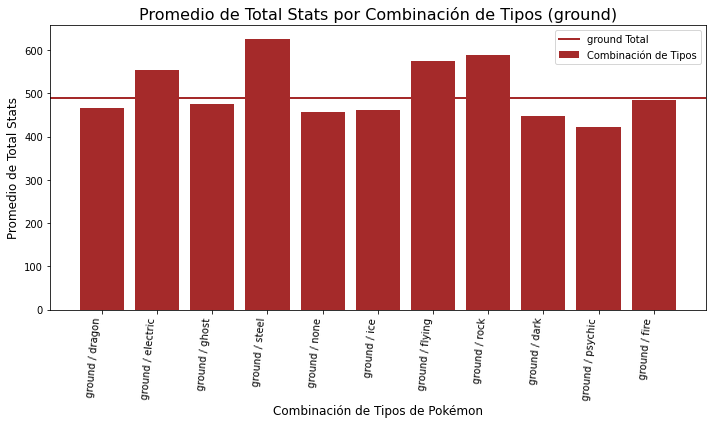

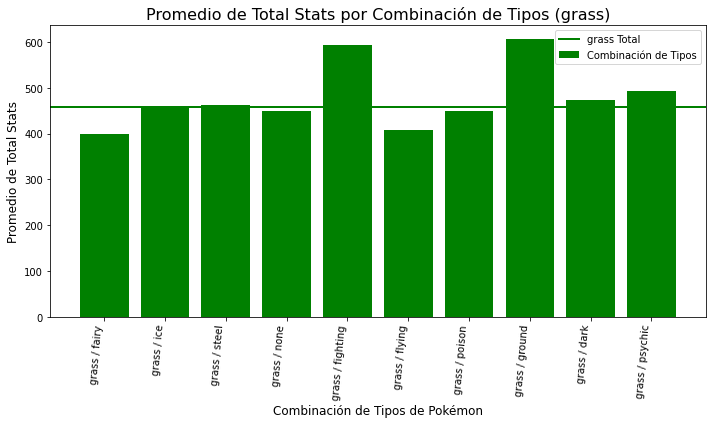

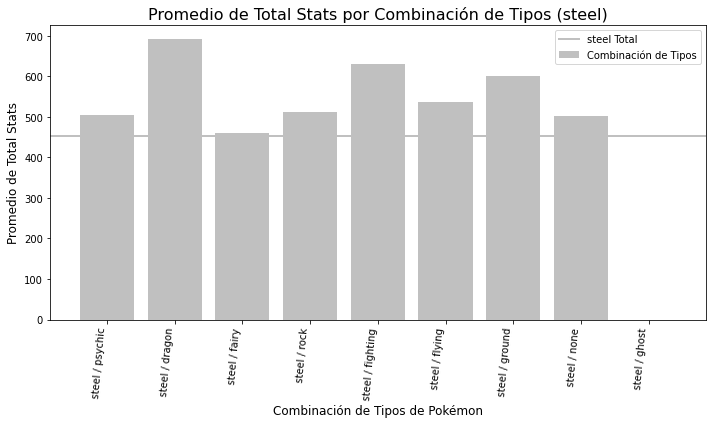

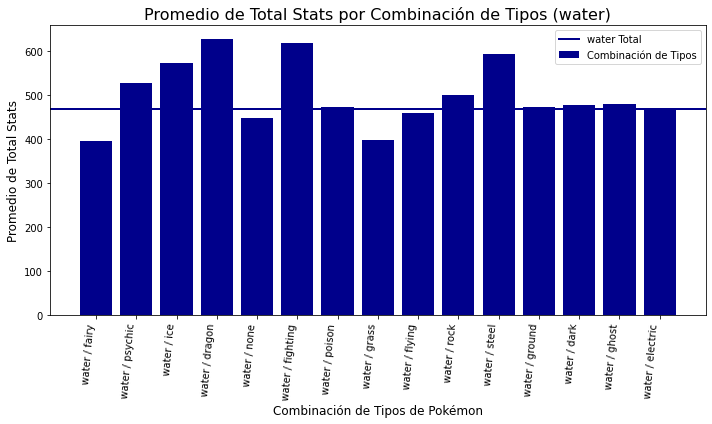

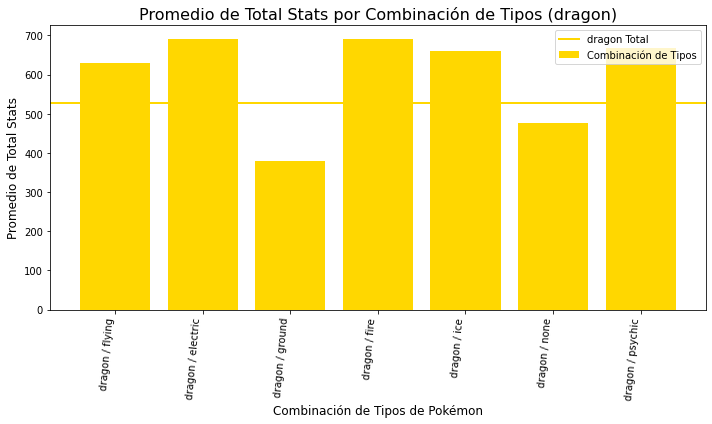

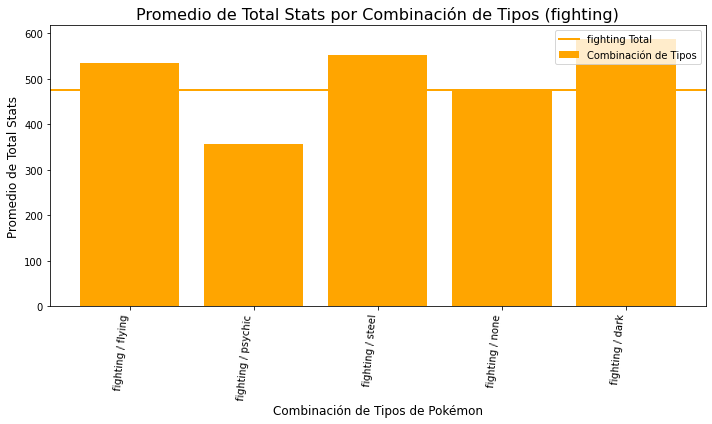

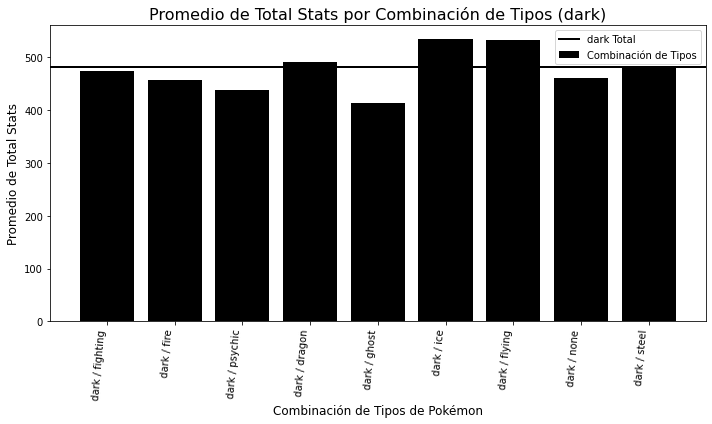

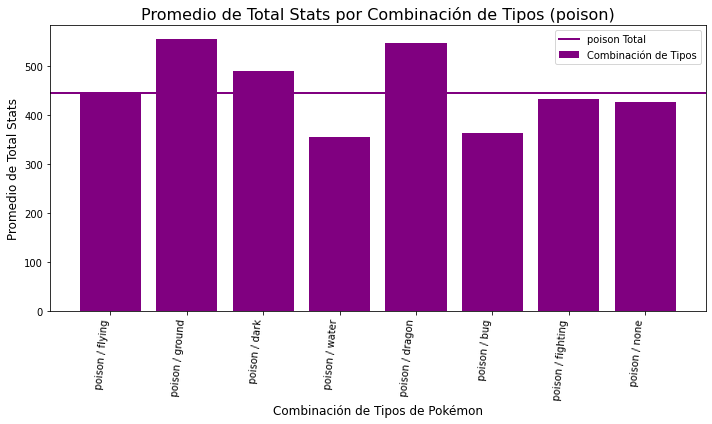

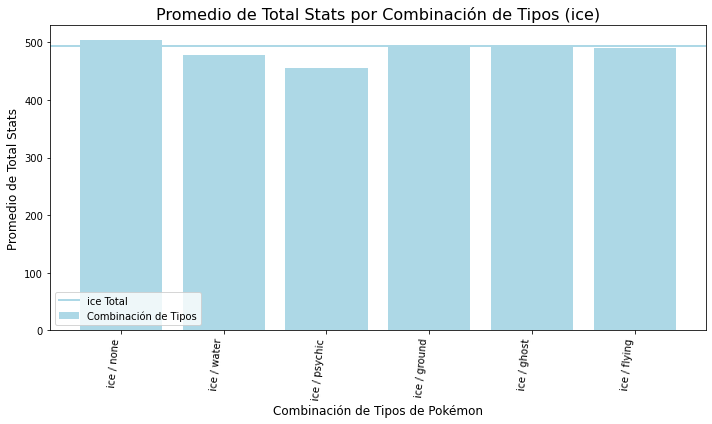

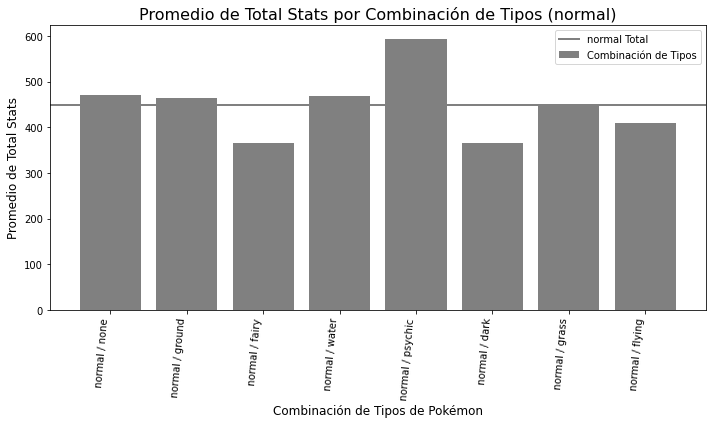

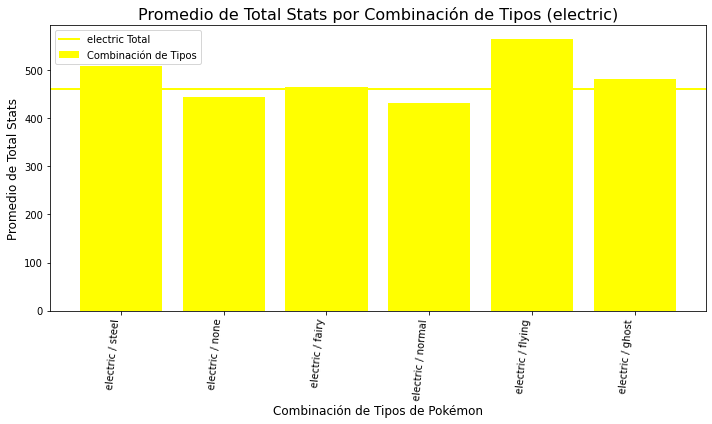

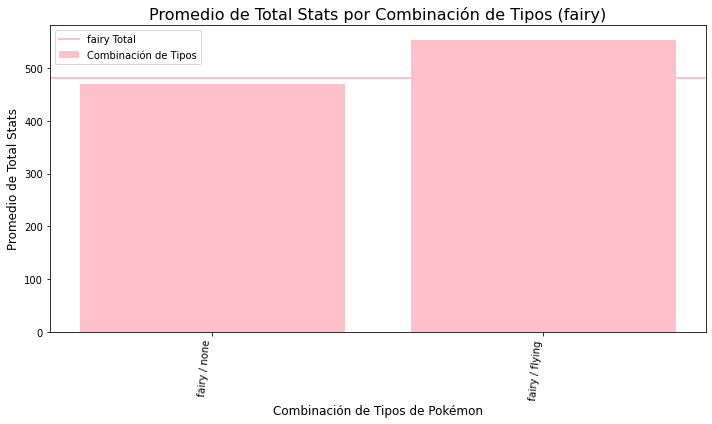

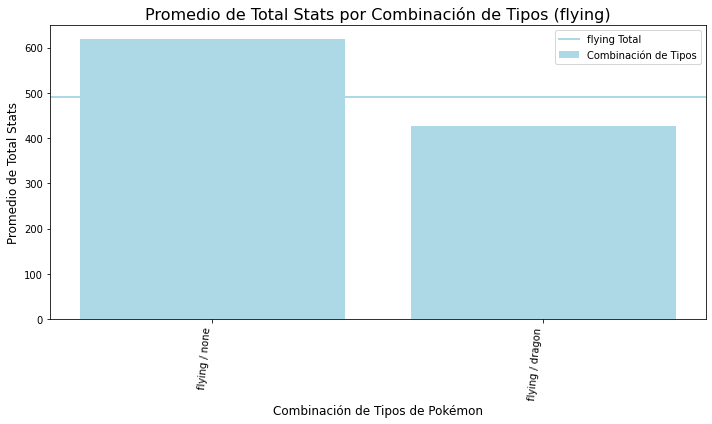

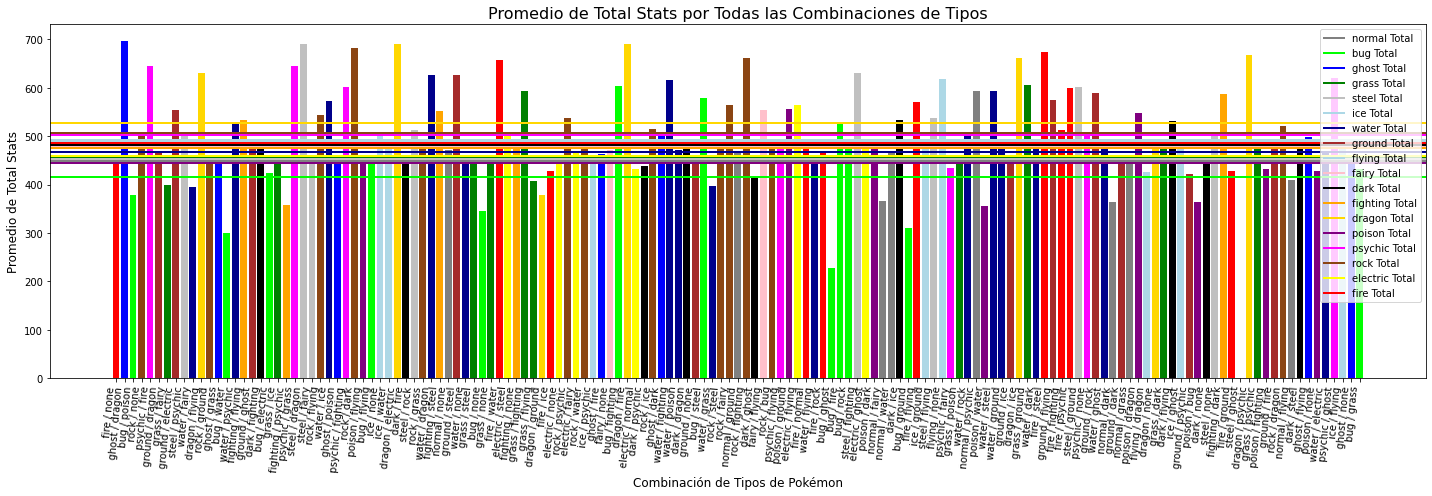

In [0]:
# Mapeo de tipos a colores
type_colors = {
    'fire': 'red',
    'bug': 'lime',
    'rock': '#8B4513',  # Marrón grisáceo
    'psychic': 'fuchsia',
    'ground': 'brown',
    'grass': 'green',
    'steel': 'silver',
    'water': 'darkblue',
    'dragon': 'gold',
    'fighting': 'orange',
    'dark': 'black',
    'poison': 'purple',
    'ice': 'lightblue',
    'normal': 'gray',
    'electric': 'yellow',
    'fairy': 'pink',
    'flying': 'lightblue'
}

# Calcular la media de 'Total Stats' por 'Type 1' y 'Type 2'
df_avg_stats = df_pokemon.groupBy('Type 1', 'Type 2').agg(
    F.avg('Total Stats').alias('avg_total_stats')
)

# Calcular también la media total para cada 'Type 1'
df_avg_stats_total = df_pokemon.groupBy('Type 1').agg(
    F.avg('Total Stats').alias('avg_total_stats_total')
)

# Recoger los resultados como una lista
avg_stats_data = df_avg_stats.collect()
avg_stats_total_data = df_avg_stats_total.collect()

# Preparar los datos para la visualización
# Agrupar los datos por 'Type 1'
type_1_groups = {}
all_labels = []
all_avg_stats = []

for row in avg_stats_data:
    type_1 = row['Type 1']
    type_2 = row['Type 2']
    avg_stats = row['avg_total_stats']
    
    label = f"{type_1} / {type_2}" if type_2 != '' else type_1
    
    all_labels.append(label)
    all_avg_stats.append(avg_stats)
    
    if type_1 not in type_1_groups:
        type_1_groups[type_1] = []
    
    type_1_groups[type_1].append((label, avg_stats))

# Crear una figura para cada tipo 1
for type_1, data in type_1_groups.items():
    labels = [item[0] for item in data]
    avg_stats = [item[1] for item in data]

    # Buscar el valor total del 'Type 1' correspondiente
    total_avg_stats = next(item['avg_total_stats_total'] for item in avg_stats_total_data if item['Type 1'] == type_1)

    # Asignar el color al tipo de Pokémon
    type_1_color = type_colors.get(type_1.lower(), 'blue')  # Si no se encuentra, usar un color por defecto (azul)

    # Crear un gráfico de barras para cada 'Type 1'
    fig, ax = plt.subplots(figsize=(10, 6))

    # Gráfico de barras para las combinaciones de tipos con color específico
    ax.bar(labels, avg_stats, color=type_1_color, label='Combinación de Tipos')

    # Añadir la barra del total del 'Type 1' como una línea con el color correspondiente
    ax.axhline(y=total_avg_stats, color=type_1_color, linewidth=2, label=f'{type_1} Total')

    # Añadir títulos y etiquetas
    ax.set_title(f'Promedio de Total Stats por Combinación de Tipos ({type_1})', fontsize=16)
    ax.set_xlabel('Combinación de Tipos de Pokémon', fontsize=12)
    ax.set_ylabel('Promedio de Total Stats', fontsize=12)

    # Rotar las etiquetas del eje X para mayor legibilidad y ajustar el tamaño de las etiquetas
    plt.xticks(rotation=85, ha='right', fontsize=10)

    # Aumentar la separación entre las etiquetas del eje X y las barras
    plt.subplots_adjust(bottom=0.25)

    # Añadir la leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Crear el gráfico que muestra todas las combinaciones
fig, ax = plt.subplots(figsize=(20, 7))

# Gráfico de barras para todas las combinaciones de tipos
for label, avg_stat in zip(all_labels, all_avg_stats):
    # Asignar color a cada barra según su 'Type 1'
    type_1 = label.split(' / ')[0]  # Obtener solo el 'Type 1' para asignar color
    type_1_color = type_colors.get(type_1.lower(), 'blue')  # Si no se encuentra, usar un color por defecto (azul)
    ax.bar(label, avg_stat, color=type_1_color)

# Añadir la línea de la media total por 'Type 1' con color correspondiente
for row in avg_stats_total_data:
    type_1 = row['Type 1']
    total_avg_stats = row['avg_total_stats_total']
    
    # Crear una barra para cada 'Type 1' con su media total
    type_1_color = type_colors.get(type_1.lower(), 'blue')  # Si no se encuentra, usar un color por defecto (azul)
    ax.axhline(y=total_avg_stats, color=type_1_color, linewidth=2, label=f'{type_1} Total')

# Añadir títulos y etiquetas
ax.set_title('Promedio de Total Stats por Todas las Combinaciones de Tipos', fontsize=16)
ax.set_xlabel('Combinación de Tipos de Pokémon', fontsize=12)
ax.set_ylabel('Promedio de Total Stats', fontsize=12)

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=85, ha='right', fontsize=10)

# Aumentar la separación entre las etiquetas del eje X y las barras
plt.subplots_adjust(bottom=0.25)

# Añadir la leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
